In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from PIL import Image

Using TensorFlow backend.
c:\Users\hannah\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\hannah\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\hannah\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\hannah\anaconda3\envs\myenv\lib\sit

In [2]:
# Load the CSV dataset
dataset = pd.read_csv('D:/Thesis Code/datasets/english.csv')


# Assuming your CSV structure has 'image_path' (path to image) and 'label' (character label) columns
image_paths = dataset['image'].values
labels = dataset['label'].values

In [3]:
# Use label encoding to convert letters to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [4]:
# Convert labels to one-hot encoded format
num_classes = len(label_encoder.classes_)
labels = to_categorical(labels, num_classes)

# Split the dataset into training and testing sets
train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)


In [5]:
# Define image dimensions and other hyperparameters
input_shape = (28, 28)
batch_size = 32
epochs = 100

In [6]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape + (1,)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
# Load and preprocess images from paths
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize(input_shape)  # Resize to model input size
    img = np.array(img)  # Convert to numpy array
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = img.reshape(input_shape + (1,))  # Reshape to match model input shape
    return img

In [9]:
# Train the model
train_images = [preprocess_image(image_path) for image_path in train_paths]
train_images = np.array(train_images)

In [10]:
history = model.fit(
    x=train_images,
    y=train_labels,
    batch_size=batch_size,
    epochs=100,
    validation_split=0.2,
    verbose=1
)



Train on 2182 samples, validate on 546 samples
Epoch 1/100
2182/2182 [==============================] - 1s 369us/step - loss: 4.1180 - accuracy: 0.0220 - val_loss: 4.0710 - val_accuracy: 0.0165
Epoch 2/100
2182/2182 [==============================] - 1s 301us/step - loss: 3.6328 - accuracy: 0.1247 - val_loss: 3.1231 - val_accuracy: 0.2070
Epoch 3/100
2182/2182 [==============================] - 1s 302us/step - loss: 2.4264 - accuracy: 0.3749 - val_loss: 2.3159 - val_accuracy: 0.3810
Epoch 4/100
2182/2182 [==============================] - 1s 312us/step - loss: 1.7125 - accuracy: 0.5440 - val_loss: 1.9634 - val_accuracy: 0.4615
Epoch 5/100
2182/2182 [==============================] - 1s 312us/step - loss: 1.3528 - accuracy: 0.6228 - val_loss: 1.7208 - val_accuracy: 0.5604
Epoch 6/100
2182/2182 [==============================] - 1s 314us/step - loss: 1.1308 - accuracy: 0.6792 - val_loss: 1.5857 - val_accuracy: 0.5678
Epoch 7/100
2182/2182 [==============================] - 1s 309us/step

Test accuracy: 0.6055718660354614


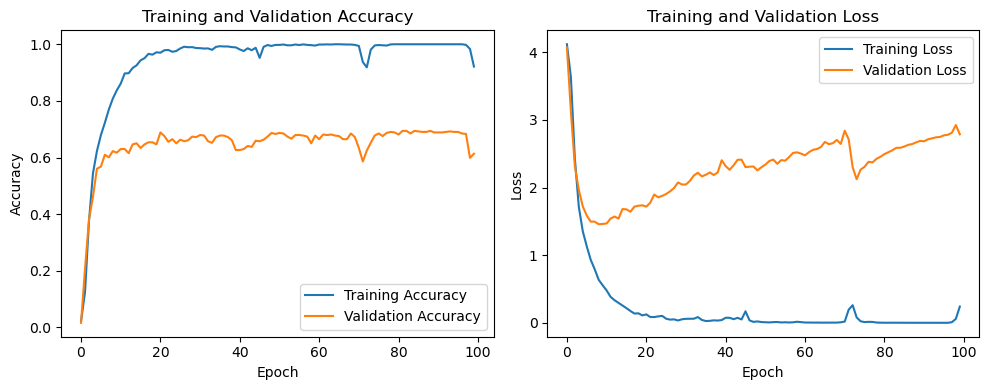

In [11]:
# Evaluate the model
test_images = [preprocess_image(image_path) for image_path in test_paths]
test_images = np.array(test_images)

accuracy = model.evaluate(test_images, test_labels, verbose=0)[1]
print("Test accuracy:", accuracy)

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Evaluate the model
test_images = [preprocess_image(image_path) for image_path in test_paths]
test_images = np.array(test_images)

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

# Identify if the model is balanced, overfitting, or underfitting
if max(history.history['val_accuracy']) - min(history.history['val_accuracy']) < 0.05:
    print("Model seems to be balanced.")
elif history.history['val_loss'][-1] < history.history['loss'][-1]:
    print("Model may be overfitting.")
else:
    print("Model may be underfitting.")

Test loss: 2.6973440227620413
Test accuracy: 0.6055718660354614
Model may be underfitting.


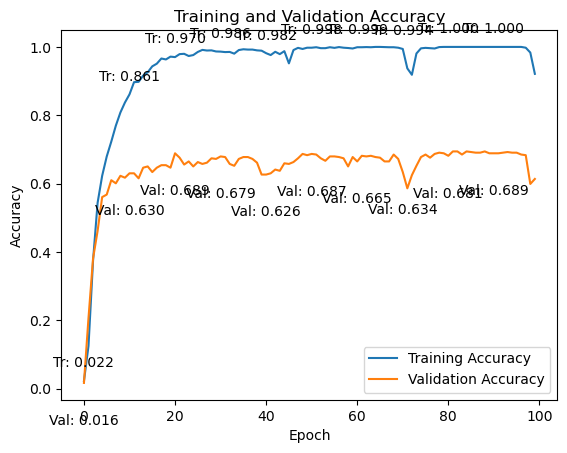

Test loss: 2.6973440227620413
Test accuracy: 0.6055718660354614
Model may be underfitting.


In [17]:
# Get accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy curves
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Annotate points with accuracy values for training and validation
annotate_interval = max(1, epochs // 10)  # Adjust interval as needed
for epoch, (train_acc, val_acc) in enumerate(zip(train_accuracy, val_accuracy)):
    if epoch % annotate_interval == 0:
        plt.annotate(f'Tr: {train_acc:.3f}', (epoch, train_acc), textcoords="offset points", xytext=(0, 10), ha='center')
        plt.annotate(f'Val: {val_acc:.3f}', (epoch, val_acc), textcoords="offset points", xytext=(0, -30), ha='center')

plt.show()

# ...

# Evaluate the model
# ...

# Identify if the model is balanced, overfitting, or underfitting
# ...

# Print the final assessment
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

if max(history.history['val_accuracy']) - min(history.history['val_accuracy']) < 0.05:
    print("Model seems to be balanced.")
elif history.history['val_loss'][-1] < history.history['loss'][-1]:
    print("Model may be overfitting.")
else:
    print("Model may be underfitting.")